## Лабораторная работа №12. Решение задач глубокого обучения.

Используемый набор данных: [banknote authentication](https://archive.ics.uci.edu/ml/datasets/banknote+authentication)

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve, roc_auc_score
from tensorflow import keras
from tensorflow.keras import layers
import os
import requests

%matplotlib inline
pd.options.display.max_columns = None

In [2]:
def downloadFile(url, filePath):
    if not os.path.exists(filePath):
        req = requests.get(url)
        f = open(filePath, "wb")
        f.write(req.content)
        f.close

url = "https://archive.ics.uci.edu/ml/machine-learning-databases/00267"
downloadFile(url + "/data_banknote_authentication.txt", "dataset/data_banknote_authentication.txt")

Опишем заголовки колонок. Для удобства используем сокращенные названия:
- **Variance** - Variance of Wavelet Transformed image.
- **Skewness** - Skewness of Wavelet Transformed image.
- **Curtosis** - Curtosis of Wavelet Transformed image.
- **Entropy** - Entropy of image.

In [3]:
headers = ["Variance", "Skewness", "Curtosis", "Entropy", "Class"]  
data = pd.read_csv("dataset/data_banknote_authentication.txt", names=headers)
data = data.astype({"Class": "category"})
data.sample(20)

,Variance,Skewness,Curtosis,Entropy,Class
811,-0.86339,1.934800,-2.37290,-1.089700,1
557,4.04050,0.515240,1.02790,1.106000,0
515,5.87820,5.940900,-2.85440,-0.608630,0
764,-1.66770,-7.153500,7.89290,0.967650,1
1247,-4.47750,-13.030300,17.08340,-3.034500,1
907,-1.39070,-1.378100,2.30550,-0.021566,1
752,0.38478,6.598900,-0.33360,-0.564660,0
1152,-2.48350,-7.449400,6.89640,-0.644840,1
199,5.88620,5.874700,-2.81670,-0.300870,0
660,4.27560,-2.652800,2.13750,0.944370,0


In [4]:
display(data.describe())
display(data.isna().sum())

,Variance,Skewness,Curtosis,Entropy
count,1372.000000,1372.000000,1372.000000,1372.000000
mean,0.433735,1.922353,1.397627,-1.191657
std,2.842763,5.869047,4.310030,2.101013
min,-7.042100,-13.773100,-5.286100,-8.548200
25%,-1.773000,-1.708200,-1.574975,-2.413450
50%,0.496180,2.319650,0.616630,-0.586650
75%,2.821475,6.814625,3.179250,0.394810
max,6.824800,12.951600,17.927400,2.449500


Variance    0
Skewness    0
Curtosis    0
Entropy     0
Class       0
dtype: int64

Подготовим данные: выберем признаки и метки и сформируем тренировочные и тестовые наборы.

In [5]:
for column in data.columns:
    le = LabelEncoder()
    data[column] = le.fit_transform(data[column])

X = data.drop(columns=["Class"]).copy()
y = data["Class"].copy()

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

Создадим нейронную сеть

In [6]:
model = keras.Sequential([
        layers.Dense(4, activation="relu"),
        layers.Dense(1, activation="sigmoid"),
    ])
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model.fit(X_train.to_numpy(), y_train.to_numpy(), batch_size=16, epochs=100)

Epoch 1/100
58/58 [==============================] - 0s 621us/step - loss: 256.5763 - accuracy: 0.5495
Epoch 2/100
58/58 [==============================] - 0s 603us/step - loss: 176.0792 - accuracy: 0.5495
Epoch 3/100
58/58 [==============================] - 0s 535us/step - loss: 113.6135 - accuracy: 0.5495
Epoch 4/100
58/58 [==============================] - 0s 569us/step - loss: 70.4626 - accuracy: 0.5495
Epoch 5/100
58/58 [==============================] - 0s 603us/step - loss: 43.2807 - accuracy: 0.5495
Epoch 6/100
58/58 [==============================] - 0s 621us/step - loss: 25.9549 - accuracy: 0.5495
Epoch 7/100
58/58 [==============================] - 0s 638us/step - loss: 13.4125 - accuracy: 0.5495
Epoch 8/100
58/58 [==============================] - 0s 621us/step - loss: 3.7779 - accuracy: 0.5593
Epoch 9/100
58/58 [==============================] - 0s 569us/step - loss: 0.8340 - accuracy: 0.6311
Epoch 10/100
58/58 [==============================] - 0s 621us/step - loss: 0.708

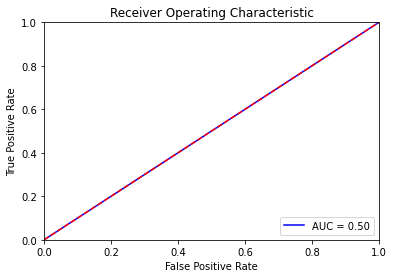

In [7]:
def calc_plot_roc(model, X_test, y_test):
    # y_pred = model.predict_classes(X_test).flatten()  # predict_classes() will be deprecated in 2021
    y_pred = np.argmax(model.predict(X_test), axis=-1).flatten()
    fpr, tpr, _ = roc_curve(y_test, y_pred)
    auc = roc_auc_score(y_test, y_pred)

    plt.title('Receiver Operating Characteristic')
    plt.plot(fpr, tpr, 'b', label = "AUC = %0.2f"%auc)
    plt.legend(loc = 'lower right')
    plt.plot([0, 1], [0, 1],'r--')
    plt.xlim([0, 1])
    plt.ylim([0, 1])
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
    plt.show()

calc_plot_roc(model, X_test, y_test)